In [1]:
import	numpy as	np
perch_length =	np.array([8.4,	13.7,	15.0,	16.2,	17.4,	18.0,	18.7,	19.0,	19.6,	20.0,
21.0,	21.0,	21.0,	21.3,	22.0,	22.0,	22.0,	22.0,	22.0,	22.5,
22.5,	22.7,	23.0,	23.5,	24.0,	24.0,	24.6,	25.0,	25.6,	26.5,
27.3,	27.5,	27.5,	27.5,	28.0,	28.7,	30.0,	32.8,	34.5,	35.0,
36.5,	36.0,	37.0,	37.0,	39.0,	39.0,	39.0,	40.0,	40.0,	40.0,
40.0,	42.0,	43.0,	43.0,	43.5,	44.0])
perch_weight =	np.array([5.9,	32.0,	40.0,	51.5,	70.0,	100.0,	78.0,	80.0,	85.0,	85.0,
110.0,	115.0,	125.0,	130.0,	120.0,	120.0,	130.0,	135.0,	110.0,	130.0,
150.0,	145.0,	150.0,	170.0,	225.0,	145.0,	188.0,	180.0,	197.0,	218.0,
300.0,	260.0,	265.0,	250.0,	250.0,	300.0,	320.0,	514.0,	556.0,	840.0,
685.0,	700.0,	700.0,	690.0,	900.0,	650.0,	820.0,	850.0,	900.0,	1015.0,
820.0,	1100.0,	1000.0,	1100.0,	1000.0,	1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input,	test_input,	train_target,	test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

print(train_input.shape,	test_input.shape)

#	reshape(-1,	1):	-1:	행의 크기를 자동 지정
train_input=train_input.reshape(-1, 1) # 2차원 배열로 변경
test_input=test_input.reshape(-1, 1) # 2차원 배열로 변경\

print(train_input.shape,	test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


### 선형 회귀(Linear Regression)
- 선형 회귀</br>
    • 데이터를 가장 잘 표현할 수 있는 직선 방정식을 찾는 알고리즘</br>
    • 특성과 타킷 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾음</br>
        – 특성과 타킷 사이의 관계: 선형 방정식의 계수(기울기) 와 절편에 저장

• LinearRegression 클래스 사용</br>
    – sklearn.linear_model 패키지</br>
    – fit(),	score(),	predict() 메소드

##### 훈련 데이터를 이용한 직선 방정식 구하기

In [9]:
from	sklearn.linear_model import	LinearRegression

lr = LinearRegression()
#	선형 회귀 모델 훈련
lr.fit(train_input,	train_target)
#	50cm	농어에 대한 예측
print('50cm:	',	lr.predict([[50]]))

#	기울기(a):	coef_,	절편(bias):	intercept_
print(lr.coef_, lr.intercept_)
# [39.01714496] => 하나의 특성( 농어의 길이)만 사용했기 때문에 배열의 원소는 1개

50cm:	 [1241.83860323]
[39.01714496] -709.0186449535477


#### 산점도 및 직선 그래프 그리기
- 기울기와 절편을 이용한 1차 방정식 그래프

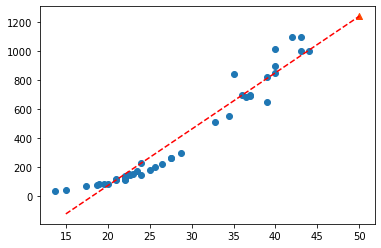

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

#	15에서 50까지 1차 방정식 그래프 그리기
#	plot([x축 데이터:시작, 끝],	[y축 데이터:시작, 끝])
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_],
color='red', linestyle='--')

#	50cm	농어 데이터
plt.scatter(50,	1241.8,	marker='^',	color='orangered')
plt.show()

# 농어 무게가 0이하로 내려갈 수 있는 문제점


In [18]:
print('train data score:	',					
lr.score(train_input,	train_target))
print('test data score:	',	
lr.score(test_input,	test_target))

# 전체적으로 과소 적합 (훈련 세트와 테스트 세트의 점수가 모두 낮음)

train data score:	 0.939846333997604
test data score:	 0.8247503123313558


In [19]:
print(15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_)

[-123.7614705] [1241.83860323]
